In [5]:
# !python -m pip install wfdb matplotlib pandas numpy

In [65]:
import os
import wfdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pathlib import Path

# The MIT-BIH dataset
This notebook demonstrates how to get access to the [MIT-BIH Arrhythmia Database](https://www.physionet.org/physiobank/database/mitdb/). Other people have already developed a python module that lets us easily download and read the data. The module is called [wfdb](https://github.com/MIT-LCP/wfdb-python).

## Downloading the database
Below i use the wfdb package to download the MIT-BIH database to a local folder.

In [46]:
dbdir = "mitdb"
if os.path.isdir(dbdir):
    print("You already have the data.")
else:
    wfdb.dl_database(dbdir, dbdir)

You already have the data.


## Reading a record
Below I read the first 3000 datapoints of a record.

In [96]:
record = wfdb.rdsamp("mitdb/100")

In [98]:
record[1]

{'fs': 360,
 'sig_len': 650000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

In [74]:
wfdb.show_ann_classes()

     extension                        description  human_reviewed
atr        atr          Reference ECG annotations            True
blh        blh         Human reviewed beat labels            True
blm        blm                Machine beat labels           False
alh        alh              Human reviewed alarms            True
alm        alm                     Machine alarms           False
qrsc      qrsc      Human reviewed QRS detections            True
qrs        qrs             Machine QRS detections           False
bph        bph  Human reviewed BP beat detections            True
bpm        bpm         Machine BP beat detections           False


In [75]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [ ]:
beats = wfdb.rdann('mitdb/231', 'atr', sampto=0)
beats.__dict__

{'record_name': '220',
 'extension': 'atr',
 'sample': array([     0,     28,    313, ..., 649277, 649584, 649904], shape=(2069,)),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N

## Plotting a record
The data contains measurements from two leads. Below I plot both.

-0.27 -0.22


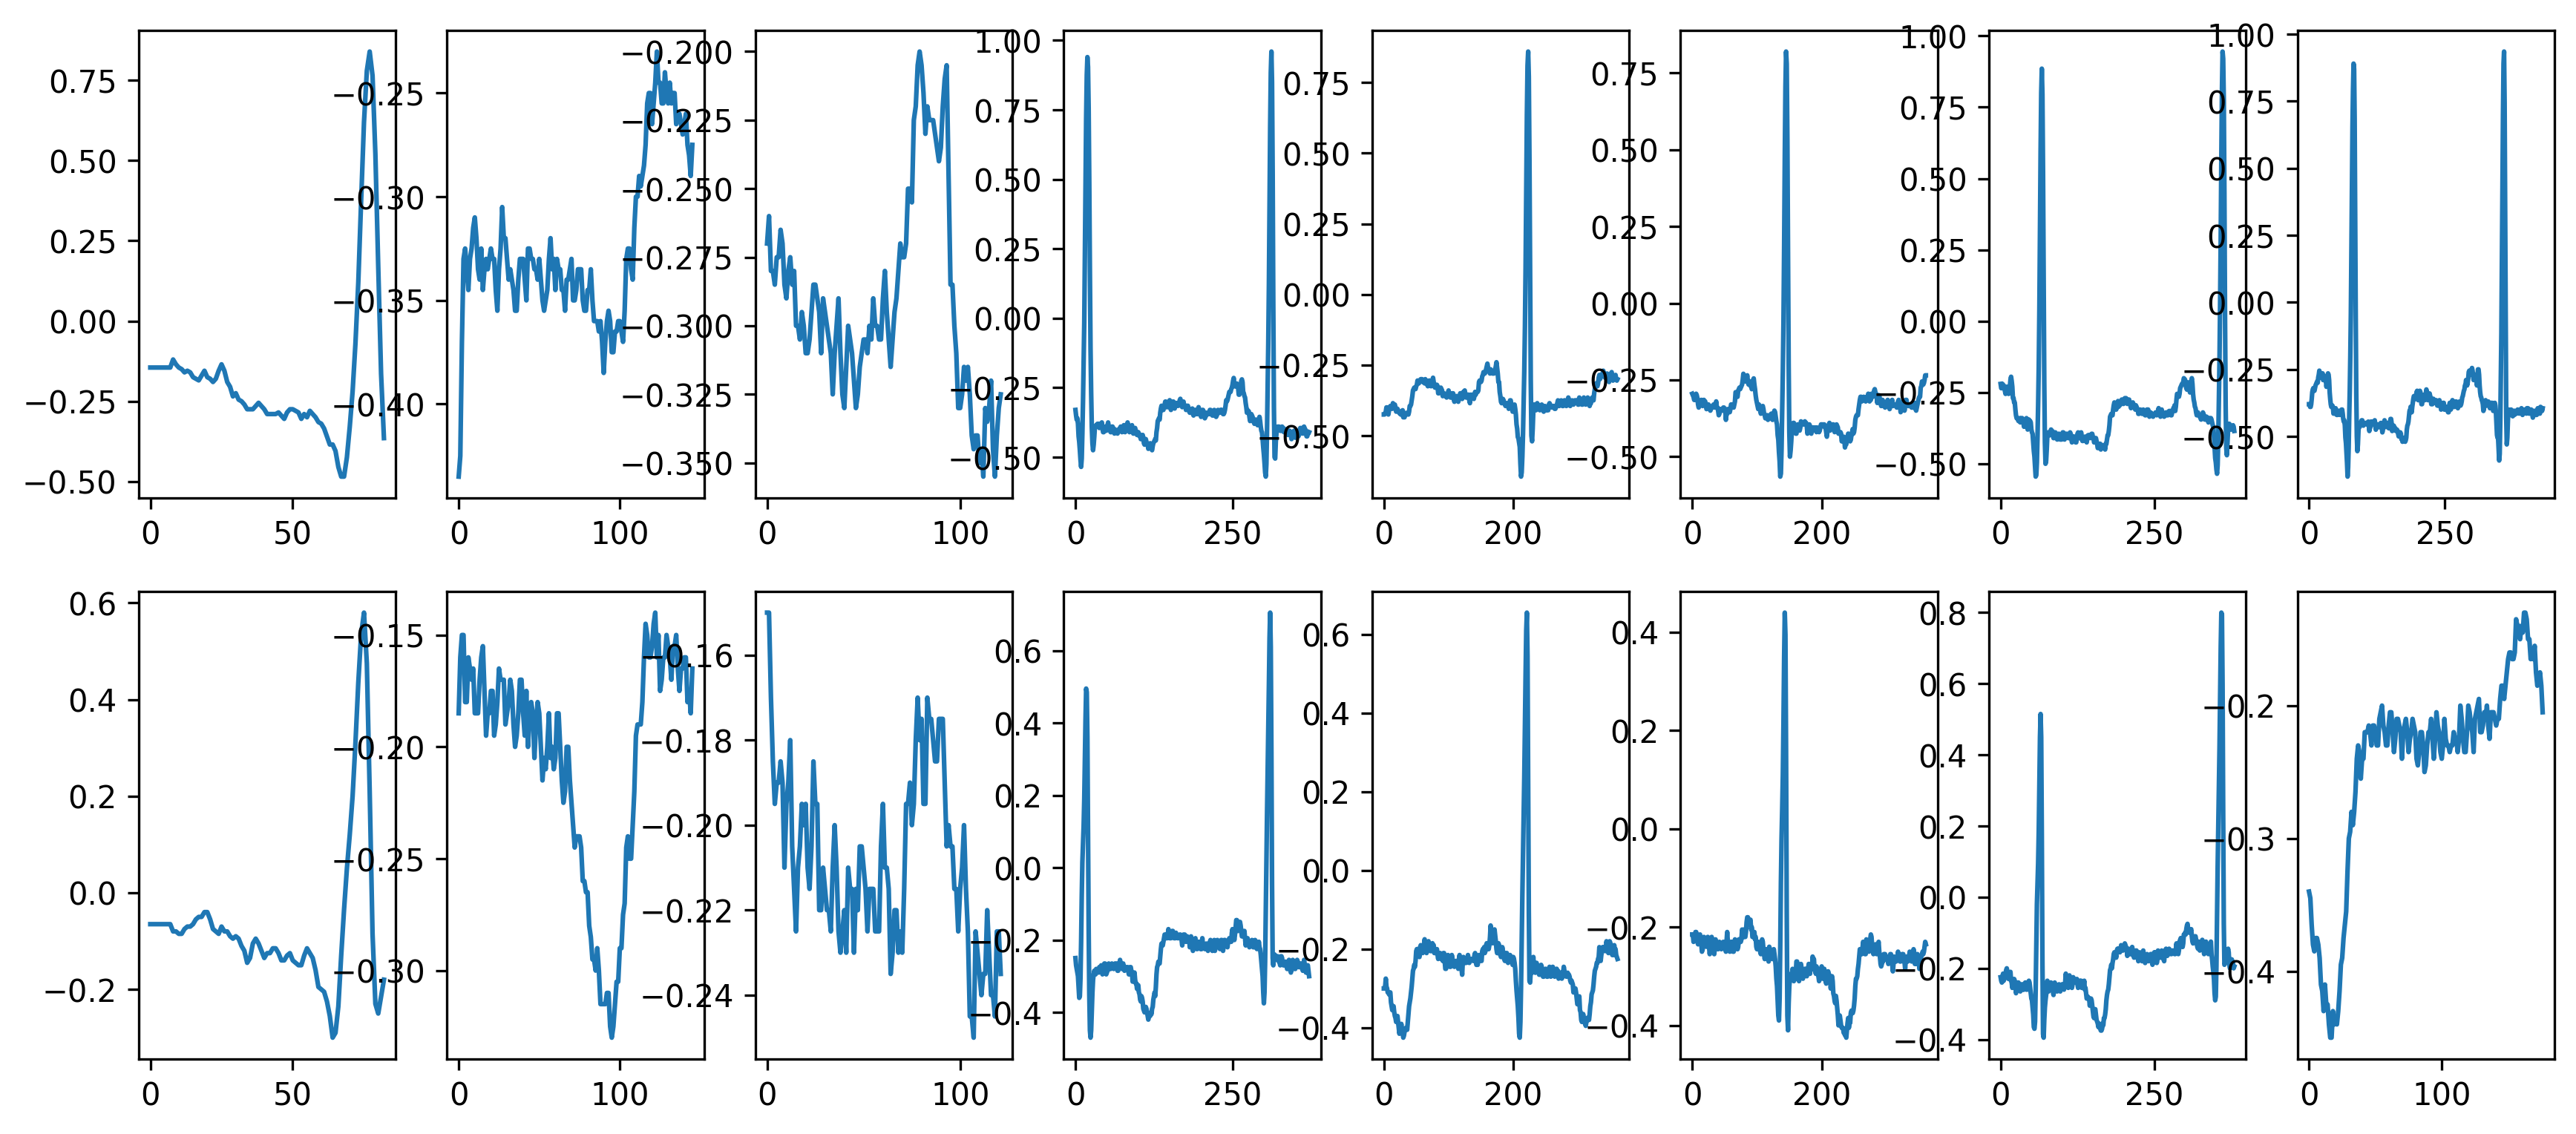

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(14,6), dpi=300)

qrsn_i = record[0][0:83, 0]
qrsn_ii = record[0][0:83, 1]
qrs0_i = record[0][83:229, 0]
qrs0_ii = record[0][83:229, 1]
qrs1_i = record[0][229:351, 0]
qrs1_ii = record[0][229:351, 1]
qrs2_i = record[0][351:724, 0]
qrs2_ii = record[0][351:724, 1]
qrs3_i = record[0][724:1086, 0]
qrs3_ii = record[0][724:1086, 1]
qrs4_i = record[0][1086:1448, 0]
qrs4_ii = record[0][1086:1448, 1]
qrs5_i = record[0][1448:1829, 0]
qrs5_ii = record[0][1448:1829, 1]
qrsx_i = record[0][33045:33476, 0]
qrsx_ii = record[0][33476:33653, 1]

print(record[0][229, 0], record[0][1448, 0])

ax[0, 0].plot(qrsn_i)
ax[1, 0].plot(qrsn_ii)
ax[0, 1].plot(qrs0_i)
ax[1, 1].plot(qrs0_ii)
ax[0, 2].plot(qrs1_i)
ax[1, 2].plot(qrs1_ii)
ax[0, 3].plot(qrs2_i)
ax[1, 3].plot(qrs2_ii)
ax[0, 4].plot(qrs3_i)
ax[1, 4].plot(qrs3_ii)
ax[0, 5].plot(qrs4_i)
ax[1, 5].plot(qrs4_ii)
ax[0, 6].plot(qrs5_i)
ax[1, 6].plot(qrs5_ii)
ax[0, 7].plot(qrsx_i)
ax[1, 7].plot(qrsx_ii)

In [78]:
column_names = []
data = np.array([])

for n in list(range(100, 235)):
    try:
        record = wfdb.rdsamp(f'mitdb/{n}')
        column_names.append(f"{n}_I")
        column_names.append(f"{n}_II")
        if len(data) == 0:
            data = np.array(record[0])
        else:
            data = np.hstack((data, np.array(record[0])))
    except:
        continue

df = pd.DataFrame(data=data, columns=column_names)
df

100_I  100_II  101_I  101_II  102_I  102_II  103_I  103_II  104_I  \
0      -0.145  -0.065 -0.345  -0.160 -0.200   0.005 -0.375   0.050 -0.150   
1      -0.145  -0.065 -0.345  -0.160 -0.200   0.005 -0.375   0.050 -0.150   
2      -0.145  -0.065 -0.345  -0.160 -0.200   0.005 -0.375   0.050 -0.150   
3      -0.145  -0.065 -0.345  -0.160 -0.200   0.005 -0.375   0.050 -0.150   
4      -0.145  -0.065 -0.345  -0.160 -0.200   0.005 -0.375   0.050 -0.150   
...       ...     ...    ...     ...    ...     ...    ...     ...    ...   
649995 -0.075  -0.480 -0.290  -0.100 -0.160   0.255 -0.200   0.100 -0.070   
649996 -0.445  -0.410 -0.295  -0.125 -0.160   0.220 -0.225   0.075 -0.070   
649997 -0.675  -0.365 -0.295  -0.110 -0.170   0.200 -0.235   0.050 -0.065   
649998 -0.765  -0.335 -0.290  -0.110 -0.195   0.195 -0.245   0.055 -0.060   
649999 -1.280   0.000  0.000   0.000  0.000   0.000  0.000   0.000  0.000   

        104_II  ...  230_I  230_II  231_I  231_II  232_I  232_II  233_I  \
0        0.200  ... -0.380  -0.285 -0.200   0.075 -0.245   0.210 -0.095   
1        0.200  ... -0.380  -0.285 -0.200   0.075 -0.245   0.210 -0.095   
2        0.200  ... -0.380  -0.285 -0.200   0.075 -0.245   0.210 -0.095   
3        0.200  ... -0.380  -0.285 -0.200   0.075 -0.245   0.210 -0.095   
4        0.200  ... -0.380  -0.285 -0.200   0.075 -0.245   0.210 -0.095   
...        ...  ...    ...     ...    ...     ...    ...     ...    ...   
649995   0.195  ... -0.600  -0.150  0.355  -0.190 -0.105   0.000 -0.480   
649996   0.200  ... -0.605  -0.160  0.355  -0.195 -0.100   0.015 -0.495   
649997   0.200  ... -0.590  -0.160  0.340  -0.195 -0.070   0.015 -0.495   
649998   0.205  ... -0.590  -0.145  0.340  -0.190 -0.075   0.035 -0.490   
649999   0.000  ...  0.000   0.000  0.000   0.000  0.000   0.000  0.000   

        233_II  234_I  234_II  
0        0.010 -0.080   0.135  
1        0.010 -0.080   0.135  
2        0.010 -0.080   0.135  
3        0.010 -0.080   0.135  
4        0.010 -0.080   0.135  
...        ...    ...     ...  
649995   0.295 -0.390   0.070  
649996   0.320 -0.390   0.070  
649997   0.320 -0.395   0.075  
649998   0.340 -0.380   0.080  
649999   0.000  0.000   0.000  

[650000 rows x 96 columns]

In [79]:
data_prepared = "mitdb_prepared"
Path(data_prepared).mkdir(parents=True, exist_ok=True)

In [80]:
df.to_csv(f"{data_prepared}/mit_bih_arrhythmia_full.csv", index=False)

df_2k = df.iloc[0:2000, :]
df_5k = df.iloc[0:5000, :]

df_5k.to_csv(f"{data_prepared}/mit_bih_arrhythmia_5k.csv", index=False)
df_2k.to_csv(f"{data_prepared}/mit_bih_arrhythmia_2k.csv", index=False)

df.shape, df_5k.shape, df_2k.shape

((650000, 96), (5000, 96), (2000, 96))

In [91]:
records = wfdb.get_record_list(dbdir)
annotations = {}
for record in records:
    annotations[record] = wfdb.rdann(f"mitdb/{record}", "atr").__dict__

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

with open(f"{data_prepared}/mit_bih_annotations.json", 'w') as json_file:
    json.dump(annotations, json_file, sort_keys=False, indent=3, cls=NumpyEncoder)

annotations

{'100': {'record_name': '100',
  'extension': 'atr',
  'sample': array([    18,     77,    370, ..., 649484, 649734, 649991], shape=(2274,)),
  'symbol': ['+',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'A',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
   'N',
